# Analyse des parkings de Montpellier
Ce notebook contient le traitement de données effectué dans le cadre de l'analyse de l'usage des parkings de Montpellier.
## Collecte des données
La collecte des données est effectuées toutes les 5 minutes depuis les datasets en Open Data suivants:
- X
- Y

Chaque échantillon est sauvegardée dans son propre dossier timestampé (format ISO 8601/RFC3339, avec une substitution du caractère ':' par '_'), eux mêmes situés selon leur type dans le dossier ``data/{bicycle, car}Parks``.

Pour plus de détails sur la collecte, voir le [code source du collecteur](../main.py)
## Importation
Le script [importerPython](./importerPython.py) est chargé de la déserialization des données récollectées:

In [39]:
import importerPython
import os

# Les scripts doivent tourner depuis la racine du projet.
# Le changement de CWD persistant après l'exécution du snippet, il peut être nécecssaire de décomenter cette ligne, d'exécuter ce snippet, puis de le recommenter.
# Cette situation est hélas assez peu idéale.
#os.chdir("../../") 
#print(os.listdir("."))

carData = importerPython.car()
bicycleData = importerPython.bicycle()


print(f"Total car parkings datapoints: {len(carData)}")
print(f"Total bicycle parkings datapoints: {len(bicycleData)}")

# On stocke ces variables dans le contexte global de notre notebook afin de ne pas avoir à retraiter les données à chaque étape.
%store rawCarData
%store rawBicycleData 

Invalid sample: 2023-01-16T19_14_59/FR_MTP_CIRC.xml: timedelta = 1692 days, 5:12:03
Invalid sample: 2023-01-16T19_14_59/FR_MTP_COME.xml: timedelta = 168 days, 3:42:01
Invalid sample: 2023-01-16T19_14_59/FR_MTP_GA109.xml: timedelta = 229 days, 7:28:12
Invalid sample: 2023-01-16T19_14_59/FR_MTP_GA250.xml: timedelta = 229 days, 7:28:12
Invalid sample: 2023-01-16T19_14_59/FR_MTP_GARE.xml: timedelta = 3 days, 3:48:57
Invalid sample: 2023-01-16T19_19_59/FR_MTP_CIRC.xml: timedelta = 1692 days, 5:17:03
Invalid sample: 2023-01-16T19_19_59/FR_MTP_COME.xml: timedelta = 168 days, 3:47:01
Invalid sample: 2023-01-16T19_19_59/FR_MTP_GA109.xml: timedelta = 229 days, 7:33:12
Invalid sample: 2023-01-16T19_19_59/FR_MTP_GA250.xml: timedelta = 229 days, 7:33:12
Invalid sample: 2023-01-16T19_19_59/FR_MTP_GARE.xml: timedelta = 3 days, 3:53:57
Invalid sample: 2023-01-16T19_24_59/FR_MTP_CIRC.xml: timedelta = 1692 days, 5:22:03
Invalid sample: 2023-01-16T19_24_59/FR_MTP_COME.xml: timedelta = 168 days, 3:52:01
I

UsageError: Unknown variable 'rawCarData'


## Filtrage
Certaines données récollectées possèdent un certain nombres d'abérations ou de propriétés les rendant inexploitables:

### Voitures
- Les parkings fermés ne sont pas représentatifs des patterns d'occupations des parkings ouverts et doivent donc être exclus ; 
- Certains parkings ne sont pas marqués comme fermés malgré l'ancienneté des données remontées (Comédie par exemple) ;
- Pour des raisons diverses (réseau, renommage), certains échantillons sont vides ou invalides. Ils doivent donc également être exclus.

On applique donc un certains nombre de filtres:
- Si le statut n'est pas "OPEN", on exclue l'échatillon du dataset
- Si la date de dernière actualisation remontée par l'API diverge de plus de 12 heures de la date de collecte, on exclue l'échantillion du dataset.
- Enfin, si l'échantillon n'est pas un fichier XML valide, on l'exclue également du dataset.

### Vélos
- La capacité totale de certains parkings est égale à 0, ce qui est problématique lors du calcul de la saturation (cas du parking "Bois vert").

Enfin, tous les samples sont triés par ordre chronologique.

Ces filtres sont pour certains appliqués directement à la déserialization, les autres le sont dans le snippet suivant:

In [40]:
# On charge le dataset
%store -r rawCarData
%store -r rawBicycleData
initialCarSamplesQty = len(carData)
# Filtre de statut
validStatus = ["OPEN", "FULL"]
for park in carData:
    if park.status.upper() not in validStatus:
        print(f"Invalid status for {park.name}: {park.status}")
        carData.remove(park)

print(f"Filtered car data. Valid samples: {len(carData)} out of {initialCarSamplesQty}")

initialBicycleSamplesQty = len(bicycleData)

for park in bicycleData:
    if park.getTotal() == 0:
        bicycleData.remove(park)
        print(f"Removed {park.name}, as its capacity was 0.")

print(f"Filtered car data. Valid samples: {len(bicycleData)} out of {initialBicycleSamplesQty}")


# On trie ensuite par ordre chronologique
carData.sort(key=lambda data: data.date)
# Même traitement pour les vélos:
bicycleData.sort(key=lambda data: data.date)

# On stocke la version filtrée.
%store carData
%store bicycleData

no stored variable or alias rawCarData
no stored variable or alias rawBicycleData
Filtered car data. Valid samples: 3001 out of 3001
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its capacity was 0.
Removed Vert Bois, as its c

## Visualization

### Saturation moyenne

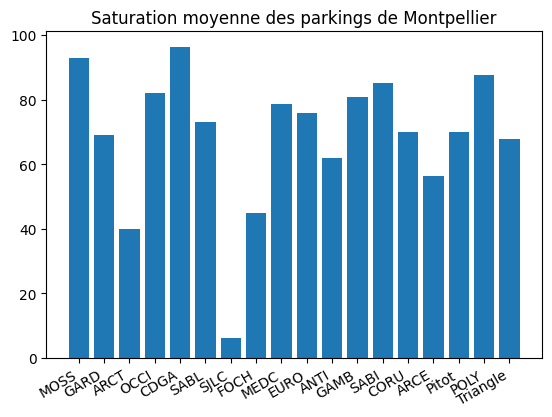

In [41]:
from matplotlib import pyplot as plt 
from datetime import datetime, timedelta

# On charge les datasets
%store -r carData
%store -r bicycleData 

# On filtre les parkings
#cutOffDate = int((datetime.today() - timedelta(days=70)).timestamp())
#parkings = [p for p in carData if (p.getDate() > cutOffDate)]

# Format souhaité : {"nom du parking": [ParkingData]}
parkingsByName = {}
for parking in carData:
    previousEntries = parkingsByName.get(parking.name, [])
    previousEntries.append(parking)
    parkingsByName.update({parking.name: previousEntries})

parkingByAvgSaturation = {}

for name, datapoints in parkingsByName.items():
    mean_array = [datapoint.getFree()/(datapoint.getTotal()) for datapoint in datapoints] 
    mean = sum(mean_array)/len(mean_array)*100 # On scale directement en pourcents.
    parkingByAvgSaturation.update({name: mean})

fig, ax = plt.subplots()
#plt.bar(x, y1)
barContainer = plt.bar(parkingByAvgSaturation.keys(), parkingByAvgSaturation.values())
plt.title("Saturation moyenne des parkings de Montpellier")
fig.autofmt_xdate() # On applique une rotation sur les labels en x afin qu'ils ne se chevauchent pas
plt.show()

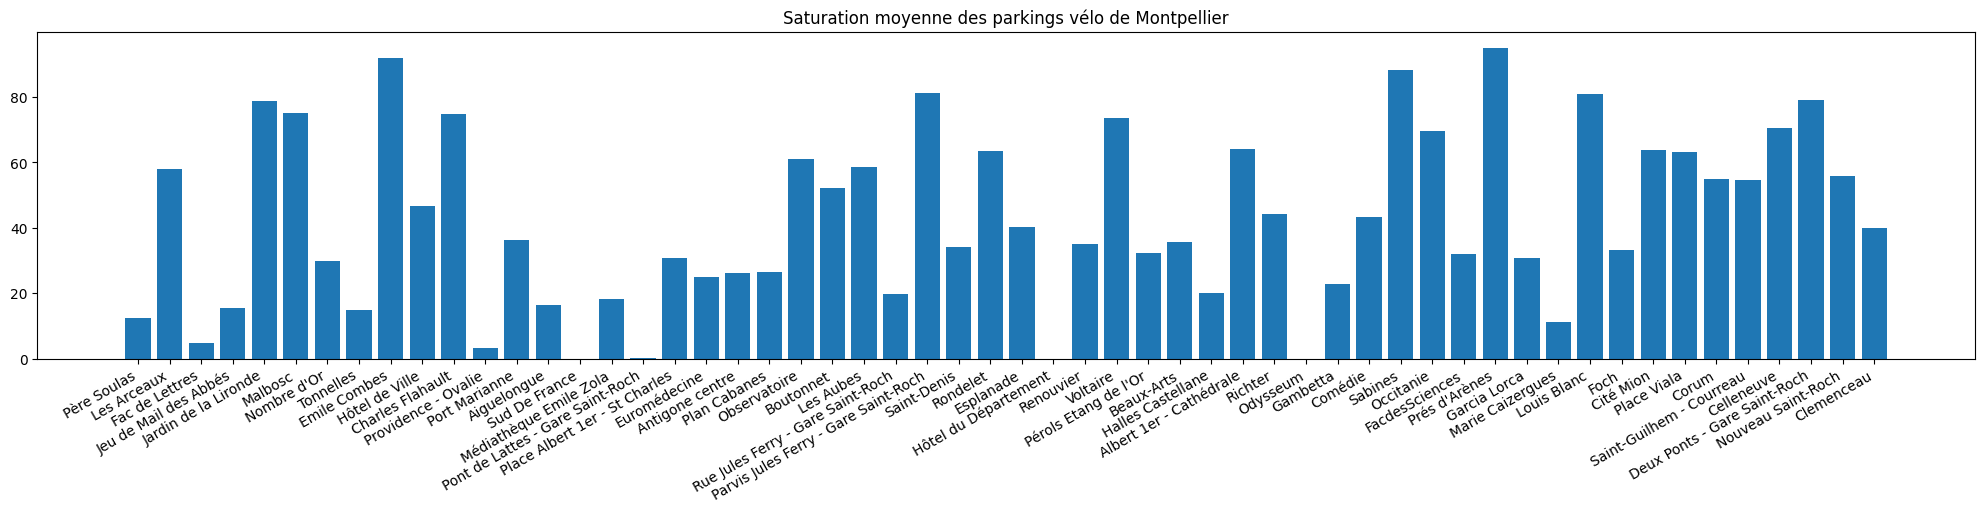

In [42]:
from matplotlib import pyplot as plt 
from datetime import datetime, timedelta

# On charge les datasets
%store -r carData
%store -r bicycleData 
parkingsByName = {}
for parking in bicycleData:
    previousEntries = parkingsByName.get(parking.name, [])
    previousEntries.append(parking)
    parkingsByName.update({parking.name: previousEntries})

parkingByAvgSaturation = {}

for name, bicycleParkDataPoints in parkingsByName.items():
    bicycleSaturation = [datapoint.getFree()/datapoint.getTotal() for datapoint in bicycleParkDataPoints if datapoint.getTotal() != 0]  
    mean = sum(bicycleSaturation)/len(bicycleSaturation)*100 # On scale directement en pourcents.
    parkingByAvgSaturation.update({name: mean})

fig, ax = plt.subplots()
#plt.plot(x, y1)
fig.set_figwidth(25)
BarContainer = plt.bar(parkingByAvgSaturation.keys(), parkingByAvgSaturation.values())
plt.title("Saturation moyenne des parkings vélo de Montpellier")
fig.autofmt_xdate() # On applique une rotation sur les labels en x afin qu'ils ne se chevauchent pas
plt.show()

### Corrélation
On calcule la covariance entre le taux de saturation des parkings à voitures et le pourcentage de vélos disponibles dans les parkings à vélos.

On interprétera cette corrélation comme un indicateur de la prévalance de l'effet de "relai vélo", défini comme l'utilisation d'un parking à voiture pour commuter vers un vélo de prêt et inversement.

### Corrélations statistiques parkings voiture.

### Corrélation avec les heures de la journée (jour de la semaine): 
On observe sur un jour de la semaine que la saturation moyenne des parkings voitures sont plus importantent le matin et le soir. On en déduit que c'est à ce moment que les trajets en voiture sont le plus solicités. Cela s'explique par le fait que les automobilistes doivent partir travailler le matin et rentrer le soir, comme le montre ce graphique.


In [ ]:
# Graphique de la saturations des parkings le lundi 16 janvier sur toute la journée.

### Corrélation avec les heures de la journée (week-end): 
De plus, on observe que sur un jour de week-end, l'inverse se produit avec une hausse de la saturation moyenne des parkings voitures l'aprem-midi, en plus du soir, contrairement au matin. Cela s'explique par le fait que les automobilistes se reposent le matin suite au travail de la semaine efffectué. La saturation des parkings l'après-midi s'explique donc par le fait qu'une fois reposés, les automobilistes utilisent le reste de la journée pour sortir décomprésser, d'où l'usage de la voiture à cette période.

In [ ]:
# Graphique de la saturations des parkings le lundi samedi 21 janvier sur toute la journée.

### Corrélation avec les jours de la semaine: 
D'autres corélations peuvent être obserées à plus grande echelle, soit la semaine. En effet, comme le montre le graphe ci-dessous, on peut voir que la saturation des parkings de Montpellier est plus importante en semaine qu'en week-end. C'est un phénomène récurent qui s'explique par le fait que les automobilistes se voient aller travailler (obligatoire) pendant la semaine, contrairement au week-end où rien ne les force à utiliser leur voiture, d'où l'écart excessif entre la saturation des parkings en semaine et en week-end.

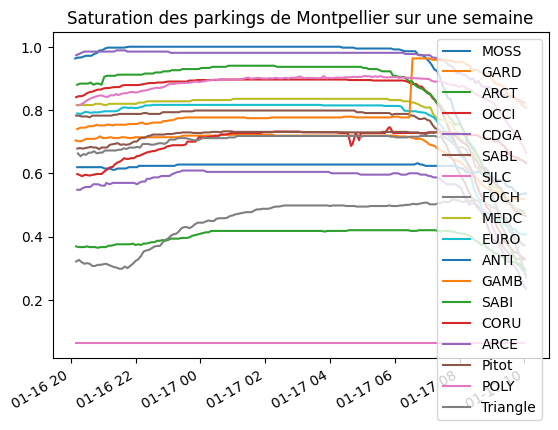

In [1]:
from matplotlib import pyplot as plt 
from datetime import datetime, timedelta
from Utils import parkingsByName
# On charge les datasets
%store -r carData
%store -r bicycleData 

fig, ax = plt.subplots()
plt.title("Saturation des parkings de Montpellier sur une semaine")
fig.autofmt_xdate() # On applique une rotation sur les labels en x afin qu'ils ne se chevauchent pas

for name, datapoints  in parkingsByName(carData).items():
    mean_array = [datapoint.getFree()/(datapoint.getTotal()) for datapoint in datapoints] 
    plotContainer = plt.plot([datetime.fromtimestamp(datapoint.getDate()) for datapoint in datapoints], mean_array, label=name)

plt.legend()
plt.show()

### Corrélation avec les événements locaux:
Des évenements extérieurs peuvent amener à influencer les caractéristiques d'un parking, comme les évenements à echelle locale qui comme le montre le graphique représenté ci-dessous, font croitre l'utilisation du parking comme au parking ... proche du théâtre Jérôme Savary où se déroule vers 21h, une pièce de théâtre accrocheur qui s'intitule "Nazi et le Barbier". En effet, les parkings ne sont pas censé être occupés à cette heure tardive à cette adresse car il n'y a pas grand chose à voir ici hormis le théâtre de  Jérôme Savary.

In [ ]:
# Graphique de la saturations d'un parking proche du théâtre Jérôme Savary le vendredi 20 janvier sur toute la journée.

### Corrélation avec les événements exeptionnels:
Il arrive que dans certains cas exeptionnels, l'utilisation des parkings voitures soient modifié, comme lors de la grève nationale du 19 janvier à Montpellier qui explique la baisse d'utilisation des voitures à cette date, et donc, de la représentation graphique de la saturations des parkings de Montpellier à cette date.

In [ ]:
# Comparaison graphique de la saturations des parkings de Montpellier le jeudi 19 janvier avec le mercredi 18 janvier.

### Corrélations statistiques parkings vélos

### Corrélation avec les politiques de la ville:
Il faut savoir que Montpellier est la 9e ville la plus chère pour se garer. De plus, celle-ci adopte de nombreuses mesures afin de diminuer la place de l’automobile comme avec la diminution du nombre de places de stationnement, piétonisation de certains quartiers ou même l'augmentation du coût du stationnement. La Métropole veut lutter contre les vols qui augmentent et découragent les cyclistes, qui de plus en plus concerne également les deux-roues. C'est pourquoi on observe une saturation importante des parkings vélo proches du centre-ville comme Louis Blanc qui est un parking vélo très fréquemment utilisé en moyenne car il se situe en plein coeur de la ville.

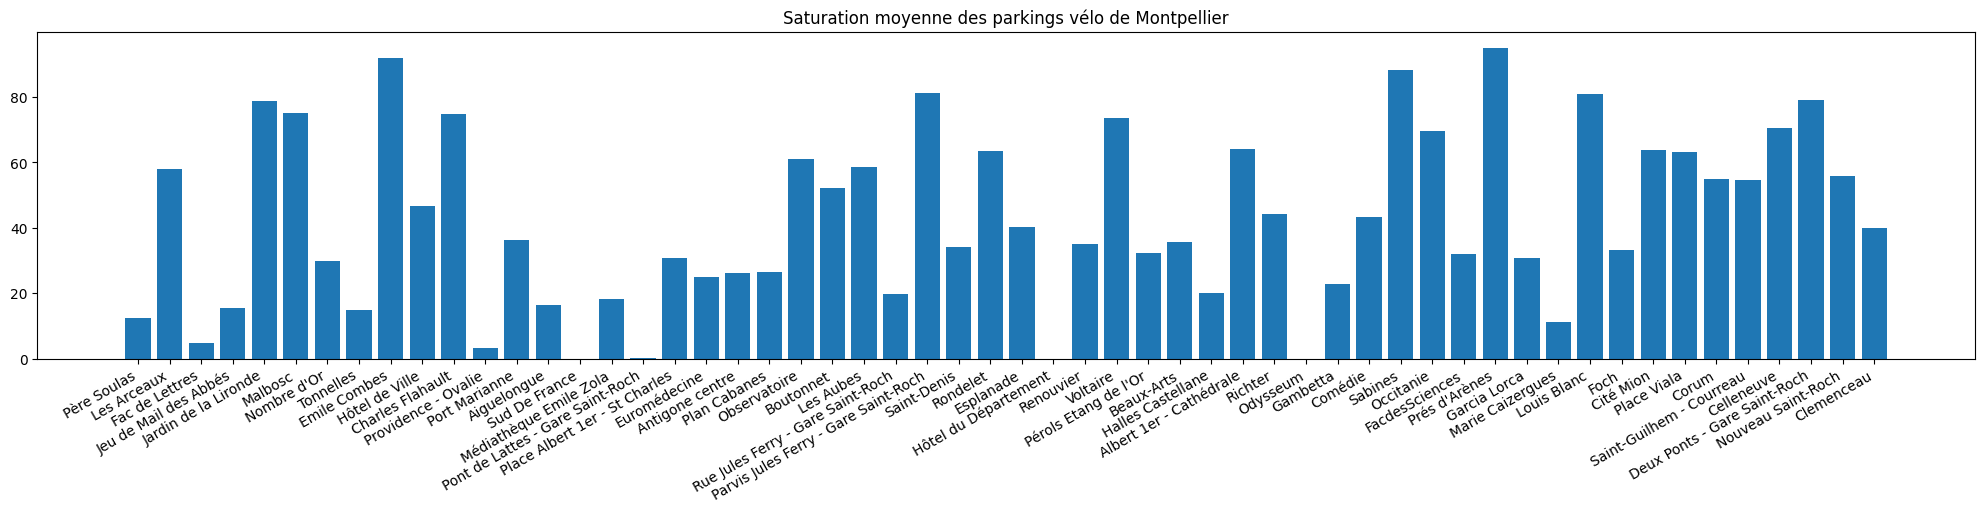

In [2]:
from matplotlib import pyplot as plt 
from datetime import datetime, timedelta

# On charge les datasets
%store -r carData
%store -r bicycleData 
parkingsByName = {}
for parking in bicycleData:
    previousEntries = parkingsByName.get(parking.name, [])
    previousEntries.append(parking)
    parkingsByName.update({parking.name: previousEntries})

parkingByAvgSaturation = {}

for name, bicycleParkDataPoints in parkingsByName.items():
    bicycleSaturation = [datapoint.getFree()/datapoint.getTotal() for datapoint in bicycleParkDataPoints if datapoint.getTotal() != 0]  
    mean = sum(bicycleSaturation)/len(bicycleSaturation)*100 # On scale directement en pourcents.
    parkingByAvgSaturation.update({name: mean})

fig, ax = plt.subplots()
#plt.plot(x, y1)
fig.set_figwidth(25)
BarContainer = plt.bar(parkingByAvgSaturation.keys(), parkingByAvgSaturation.values())
plt.title("Saturation moyenne des parkings vélo de Montpellier")
fig.autofmt_xdate() # On applique une rotation sur les labels en x afin qu'ils ne se chevauchent pas
plt.show()

### Corrélation avec son accessibilité: 
En effet, un parking à vélos est plus susceptible d'être utilisé s'il est facilement accessible, par exemple s'il est situé près des stations de transport en commun, des principales destinations touristiques ou des centres commerciaux comme le parking Louis Blanc de tout-à-l'heure, ou comme le parking Pl. Albert 1er qui est par ailleurs très proche de l'université de la Faculté de Droit et Science politique de Montpellier, ce qui justifie une telle saturation car la majorité des étudiants utilisent les vélos pour se déplacer jusqu'à leur lieu d'étude de part le manque d'argent et le rapprochement de domicile avec celui-ci (les facs prennent obligatoirement les étudiants qui n'ont été acceptés nul part en fonction de leur adresse de logement).

### Corrélations avec la sécurité:
Toujours à l'appui du graphique représenté ci-dessus, une autre corrélation des données représentées des parkings vélo de Montpellier concerne la sécurité de ces derniers. En effet, si les parkings à vélos sont sécurisés et bien éclairés, ils sont plus susceptibles d'être utilisés. C'est le cas du parking vélo 1er Saint Charles qui est l'un des premiers parking de Montpellier à favoriser de box sécurisés, qui ont pour but de lutter contre les vols qui augmentent et découragent les cyclistes.

### Corrélations avec la capacité: 
Comme pour les parkings voiture, un parking à vélos de capacité plus faible sera plus souvent (et rapidement) rempli qu'un autre de plus grande capacité. L'exemple parfait se reflète à travers le pôle service vélo à la gare Saint Roch (400m²) qui a une saturation moyenne plus basse qu'un parking vélo à plus faible capacité comme Renouvier (225m²) ainsi qu'une position géographique local moins attractive (plus loin du centre-ville)

In [ ]:
# 1 graphique de la saturation moyenne de Rue Jules Ferry-Garre Saint Roche et 1 de Renouvier à une certaine date
# et/ou
# même chose mais sur 24h pour voir le temps de saturation de parkings de capacité différente.

### Corrélations avec le temps:
Si les conditions météorologiques sont défavorables, il est possible de voir une baisse de l'utilisation des relais à vélos. En effet, ce jeudi 19 janvier, Montpellier fut mis en alerte orange suite à l'arrivée de neige-verglas au sud de la France, c'est pourquoi on peut voir une légère baisse de la saturation moyenne des parkings vélos entre le le mercredi 18 janvier et le jeudi 19 janvier.

In [ ]:
# Comparaison graphique de la saturations des parkings vélo de Montpellier le jeudi 19 janvier avec le mercredi 18 janvier.

### Corrélation avec les événements exeptionnels:
Entre le 02/01 et le 12/02, le réseau de Montpellier sera rénover au niveau de Saint-Denis. Même si nous ne pouvons pas comparer nos données récoltées avec celles précedents le 2 janvier, on peut néanmoins constater une saturation plutôt basse du parking Saint-Denis malgrès une position géographique avantageuse, contrairement à Renouvier par exemple, concordant avec nos informations. 

In [ ]:
# graphique de la saturation moyenne de Rue Jules Ferry-Garre Saint Roche et de Renouvier